In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,classification_report,confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
iris=datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
X=np.array(df.iloc[:,[1,3]])
y=np.array(df.iloc[:,-1])

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
#Standardize data
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [6]:
logreg=LogisticRegression()
logreg.fit(X_train_std,y_train)
y_pred=logreg.predict(X_test_std)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [7]:
C_M=confusion_matrix(y_test,y_pred)
print(C_M)

[[19  0  0]
 [ 0  7  6]
 [ 0  0 13]]


In [8]:
R2=r2_score(y_test,y_pred)
print(R2)

0.8076923076923077


In [9]:
C_R=classification_report(y_test,y_pred)
print(C_R)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.54      0.70        13
           2       0.68      1.00      0.81        13

   micro avg       0.87      0.87      0.87        45
   macro avg       0.89      0.85      0.84        45
weighted avg       0.91      0.87      0.86        45



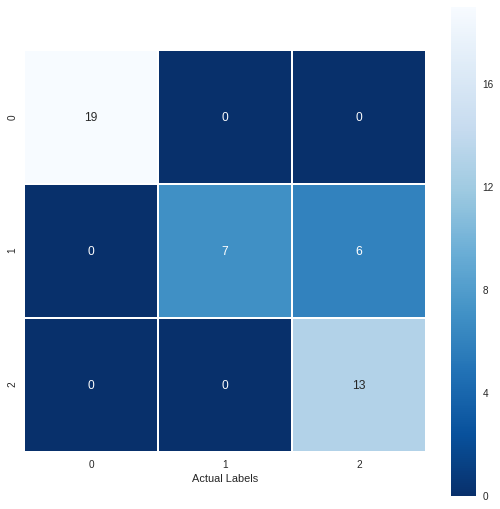

In [10]:
plt.figure(figsize=(9,9))
sns.heatmap(C_M,annot=True,linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted Labels')
plt.xlabel('Actual Labels')
plt.show()